# ALCHEMY OF REAL ESTATE VALUE

## 1. Business Understanding:

The project centers on addressing the practical challenge of identifying optimal real estate investment opportunities in a dynamic market. The core objective is to empower decision-makers with data-driven insights, enabling them to make informed investment choices. By prioritizing profit optimization, risk mitigation, and ROI enhancement, the project directly serves the needs of the investment firm. The outcomes of this analysis have broader implications for professionals and participants in the real estate market, contributing valuable insights to guide their actions. This approach ensures that the project provides relevant, actionable, and meaningful results, aligning with the checklist's criteria for business understanding.

### a) Problem Statement
This project seeks to identify high-potential real estate investments for a fictional investment firm. The task involves optimizing profit while managing risk, ensuring a favorable ROI. Decision-makers in a dynamic real estate market require data-driven insights for informed investments. The project's objective is to empower executives, maximizing returns for the firm and benefiting the broader real estate market.

### b) Metrics of Success

To determine the best-performing zip codes, we'll rely on the following metrics:

* Return On Investment (ROI): This measures profitability, with higher values indicating better performance.

* Akaike Information Criterion (AIC): AIC balances model fit and complexity, with lower values being preferable.

* Root Mean Square Error (RMSE): RMSE measures prediction accuracy, where lower values are better.

### c) Main Objective:

* Identify the top 5 real estate investment opportunities in specific zip codes.

####  Specific Objectives:

* Analyze historical real estate data for trends.

* Find promising zip codes with growth potential.

### d) Data Relevance
The dataset consists of a total of 14,723 rows and encompasses 272 different variables:

* RegionID: A unique identifier ranging from 58196 to 753844.
* RegionName: A unique Zip Code, varying between 1001 and 99901.
* City: The city in which the respective zip code is situated.
* State: The state where the zip code is located.
* Metro: The metropolitan area encompassing the zip code.
* CountyName: The county within which the zip code falls.
* SizeRank: A numerical ranking reflecting the size of the zip code, ranked from 1 to 14723.
* 1996-04 through 2018-04: These columns represent the median housing sales values for each month, from April 1996 through April 2018, amounting to 265 data points of monthly data for each zip code.

### 2. Data Understanding

In [257]:
#Importing data libraries
import numpy as np
import pandas as pd

#importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#importing math libraries
from math import sqrt

#Importing modeling libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error as MSE

import warnings
warnings.filterwarnings("ignore")

In [258]:
# Importing the data from the csv 
df = pd.read_csv('zillow_data.csv')

# Examining the first five rows of our dataframe
df.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [259]:
df.shape

(14723, 272)

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [261]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


### 3. Data Preparation

In [262]:
# Check for missing and duplicate values
print(df.isnull().sum())
print(df.duplicated().sum())

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64
0


In [263]:
# list columns with null values
df.columns[df.isna().any()].tolist()

['Metro',
 '1996-04',
 '1996-05',
 '1996-06',
 '1996-07',
 '1996-08',
 '1996-09',
 '1996-10',
 '1996-11',
 '1996-12',
 '1997-01',
 '1997-02',
 '1997-03',
 '1997-04',
 '1997-05',
 '1997-06',
 '1997-07',
 '1997-08',
 '1997-09',
 '1997-10',
 '1997-11',
 '1997-12',
 '1998-01',
 '1998-02',
 '1998-03',
 '1998-04',
 '1998-05',
 '1998-06',
 '1998-07',
 '1998-08',
 '1998-09',
 '1998-10',
 '1998-11',
 '1998-12',
 '1999-01',
 '1999-02',
 '1999-03',
 '1999-04',
 '1999-05',
 '1999-06',
 '1999-07',
 '1999-08',
 '1999-09',
 '1999-10',
 '1999-11',
 '1999-12',
 '2000-01',
 '2000-02',
 '2000-03',
 '2000-04',
 '2000-05',
 '2000-06',
 '2000-07',
 '2000-08',
 '2000-09',
 '2000-10',
 '2000-11',
 '2000-12',
 '2001-01',
 '2001-02',
 '2001-03',
 '2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '2002-08',
 '2002-09',
 '2002-10',
 '2002-11',
 '2002-12',
 '2003-01',
 '2003

In [264]:
# Drop unnecessary columns
df = df.drop(columns = ['Metro','CountyName'], axis=1)

In [265]:
# Backfill null values in columns with missing data
df.fillna(method='backfill')

,RegionID,RegionName,City,State,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,1,334200.0,335400.0,336500.0,337600.0,338500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,2,235700.0,236900.0,236700.0,235400.0,233300.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,3,210400.0,212200.0,212200.0,210700.0,208300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,4,498100.0,500900.0,503100.0,504600.0,505500.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,5,77300.0,77300.0,77300.0,77300.0,77400.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,14719,94600.0,94300.0,94000.0,93700.0,93400.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,14720,92700.0,92500.0,92400.0,92200.0,92100.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,14721,57100.0,57300.0,57500.0,57700.0,58000.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,14722,191100.0,192400.0,193700.0,195000.0,196300.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [266]:
# Recheck if there's any null values
df.isnull().sum()

RegionID      0
RegionName    0
City          0
State         0
SizeRank      0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 270, dtype: int64

In [267]:
# Renaming columns
df.rename(columns={'RegionName': 'ZipCode'}, inplace=True)

### 4. Data Preprocessing

* To inform investment decisions, we'll calculate these key metrics for each zip code:

    1. Historical ROI: Indicates property value appreciation.
    2. Monthly Price Volatility (std): Measures price fluctuations.
    3. Historical Mean Price (mean): Represents typical prices.
    4. Coefficient of Variance (CV): Evaluates price stability relative to the mean.

In [268]:
# Calculate ROI
df['ROI'] = (df['2018-04'] / df['1996-04']) - 1

# Calculate std, mean, and CV
df['std'] = df.loc[:, '1996-04':'2018-04'].std(axis=1)
df['mean'] = df.loc[:, '1996-04':'2018-04'].mean(axis=1)
df['CV'] = df['std'] / df['mean']

# Display selected columns
df[['ZipCode', 'std', 'mean', 'ROI', 'CV']].head(100)

,ZipCode,std,mean,ROI,CV
0,60657,190821.103965,743978.867925,2.083782,0.256487
1,75070,33537.101427,219655.849057,0.365295,0.152680
2,77494,37730.794353,262110.566038,0.567966,0.143950
3,60614,231225.944628,974139.245283,1.623971,0.237364
4,79936,18167.079218,101875.471698,0.571798,0.178326
...,...,...,...,...,...
95,11234,123160.303830,374560.000000,2.443413,0.328813
96,92683,148048.331872,420310.188679,2.814750,0.352236
97,85710,33439.316277,143930.188679,0.909091,0.232330
98,78745,41733.948394,172890.566038,1.182963,0.241389


##### Identifying Top Investment Opportunities

1. CV Examination: Analyze the Coefficient of Variation (CV) for each zip code to gauge the volatility of housing prices.

2. Upper CV Limit: Set an upper limit for CV using the 60th percentile. This serves as a filter, excluding zip codes with higher-than-acceptable risk.

3. ROI and Risk Profile: Identify zip codes that not only exhibit the best historical Return on Investment (ROI) but also align with the defined risk profile, ensuring a balance of potential returns and risk mitigation.

In [269]:
# Descriptive statistics of CV
cv_stats = df['CV'].describe()
print(cv_stats)

# Define upper CV limit according to risk profile
upper_cv = df['CV'].quantile(0.6)
print(f'\nCV upper limit: {upper_cv}')

# Get the top 5 zip codes with highest ROIs within the risk profile
top_10 = df[df['CV'] < upper_cv].nlargest(10, 'ROI')

count    14723.000000
mean         0.219913
std          0.084749
min          0.019330
25%          0.156041
50%          0.216008
75%          0.276864
max          0.697541
Name: CV, dtype: float64

CV upper limit: 0.23988251036426236


**Observations**

* The mean CV for all zip codes is approximately 0.220.
* In accordance with our risk tolerance, we established an upper CV limit of 0.240.

In [270]:
# Get location names for the best 10 zip codes
best10_zipcodes = top_10['ZipCode'].tolist()
for zipcode in best10_zipcodes:
    city = df.loc[df['ZipCode'] == zipcode, 'City'].values[0]
    state = df.loc[df['ZipCode'] == zipcode, 'State'].values[0]
    print(f'Zipcode: {zipcode}\nLocation: {city}, {state}\n')

Zipcode: 49309
Location: Bitely, MI

Zipcode: 40107
Location: Boston, KY

Zipcode: 48822
Location: Eagle, MI

Zipcode: 49265
Location: Onsted, MI

Zipcode: 49425
Location: Holton, MI

Zipcode: 29645
Location: Gray Court, SC

Zipcode: 66206
Location: Leawood, KS

Zipcode: 48835
Location: Fowler, MI

Zipcode: 48894
Location: Westphalia, MI

Zipcode: 15486
Location: Franklin, PA



##### **Reshaping the dataset from wide to long format**

In [271]:
# Reshape the dataset to long format
df_reshaped = pd.melt(top_5, id_vars=['RegionID', 'ZipCode', 'City', 'State', 'SizeRank', 'ROI', 'CV', 'std', 'mean'],
                  var_name='time', value_name='value')

# Drop rows with missing values in the 'value' column
df_reshaped = df_reshaped.dropna(subset=['value'])

# Convert the 'time' column to datetime
df_reshaped['time'] = pd.to_datetime(df_reshaped['time'])

# Display the reshaped dataset
df_reshaped

,RegionID,ZipCode,City,State,SizeRank,ROI,CV,std,mean,time,value
0,79678,49309,Bitely,MI,13315,3.353982,0.231683,8755.699818,37791.698113,1996-04-01,11300.0
1,75522,40107,Boston,KY,13357,3.018970,0.231908,21638.431224,93306.037736,1996-04-01,36900.0
2,79397,48822,Eagle,MI,12964,2.963519,0.213312,30813.609976,144453.207547,1996-04-01,46600.0
3,79648,49265,Onsted,MI,10691,2.931034,0.232729,28923.199467,124278.490566,1996-04-01,40600.0
4,79742,49425,Holton,MI,12239,2.903614,0.230111,15550.058490,67576.226415,1996-04-01,24900.0
...,...,...,...,...,...,...,...,...,...,...,...
1320,79678,49309,Bitely,MI,13315,3.353982,0.231683,8755.699818,37791.698113,2018-04-01,49200.0
1321,75522,40107,Boston,KY,13357,3.018970,0.231908,21638.431224,93306.037736,2018-04-01,148300.0
1322,79397,48822,Eagle,MI,12964,2.963519,0.213312,30813.609976,144453.207547,2018-04-01,184700.0
1323,79648,49265,Onsted,MI,10691,2.931034,0.232729,28923.199467,124278.490566,2018-04-01,159600.0


### 5. Exploratory Data Analysis

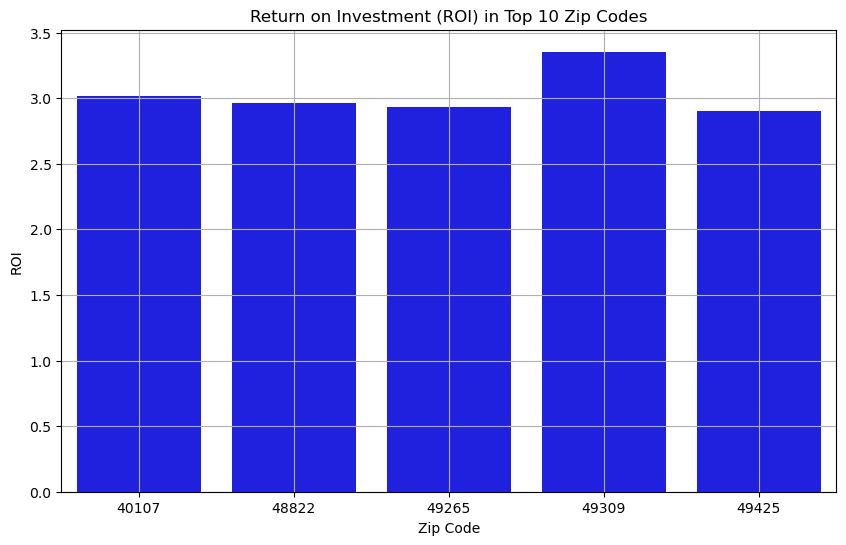

In [277]:
# Bar Plot Comparing ROI in Top Zip Codes
plt.figure(figsize=(10, 6))
sns.barplot(data=df_reshaped, x='ZipCode', y='ROI', color='blue')
plt.title('Return on Investment (ROI) in Top 10 Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('ROI')
plt.grid(True)
plt.show()

* Based on this visualization, it is evident that Zipcode 49309 has consistently delivered the highest ROI over the years, with Zipcode 40107 following as the next top performer.

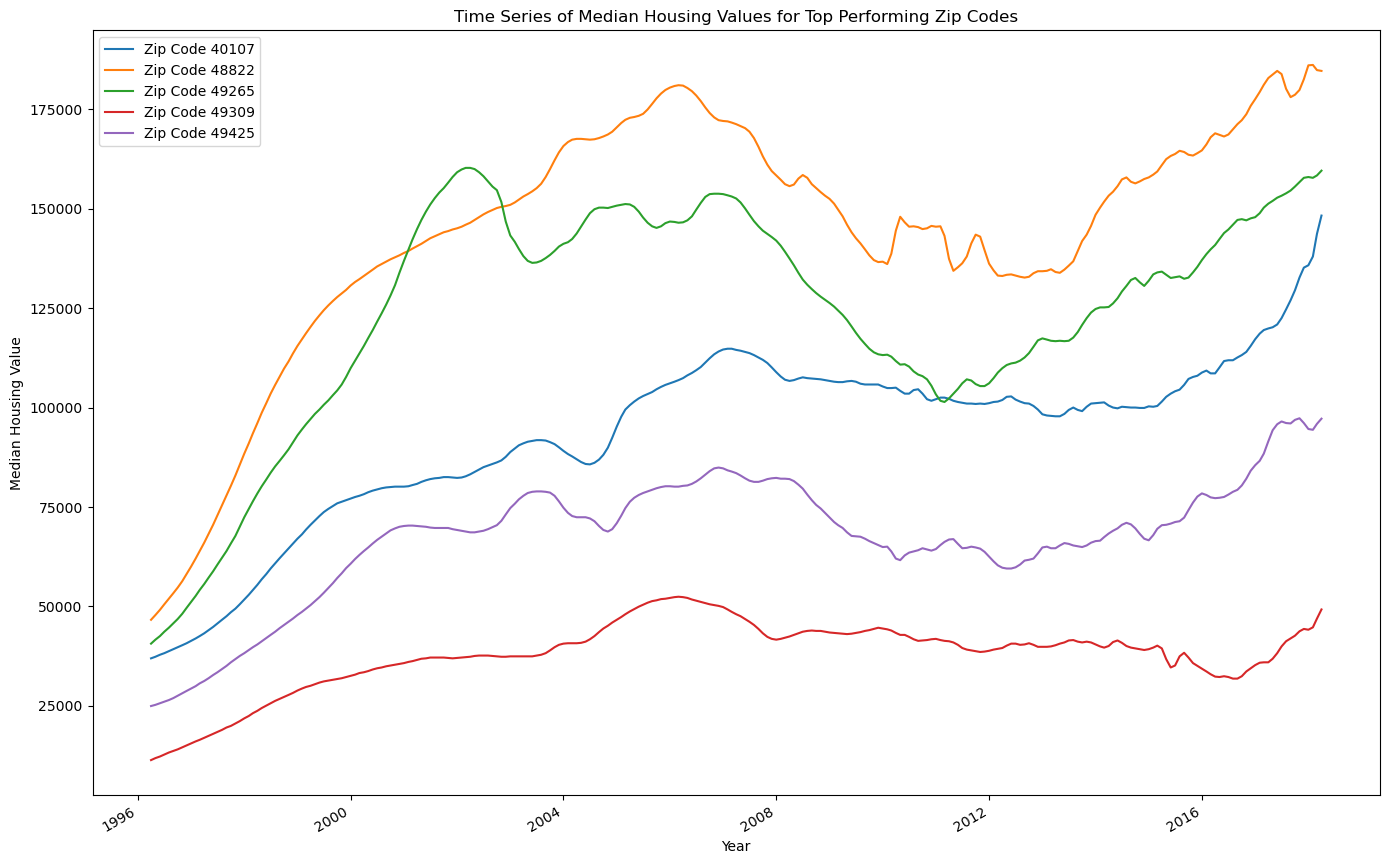

In [273]:
# Creating a Pivot Table for Median Property Values
pivot_df = df_reshaped.pivot_table(index='ZipCode', columns='time', values='value', aggfunc='median')

# Sorting Zip Codes by ROI
top_performers = df_reshaped['ROI'].sort_values(ascending=False).head(10)

# Visualizing Time Series of Median Property Values
plt.figure(figsize=(14, 10))
for col in pivot_df.index[:10]:  # Plotting top 10 zip codes
    plt.plot(pivot_df.columns, pivot_df.loc[col], label=f'Zip Code {col}')
plt.xlabel('Year')
plt.ylabel('Median Housing Value')
plt.title('Time Series of Median Housing Values for Top Performing Zip Codes')
plt.legend()
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.show()

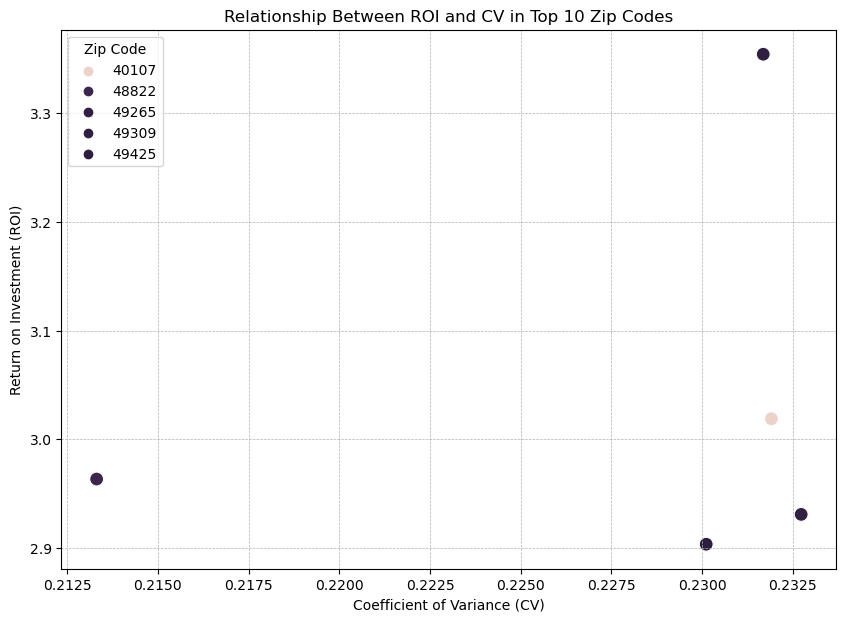

In [276]:
# Scatter Plot Showing ROI vs. CV Relationship in Top Zip Codes
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_reshaped, x='CV', y='ROI', hue='ZipCode', s=100, color='blue', legend='full')
plt.title('Relationship Between ROI and CV in Top 10 Zip Codes')
plt.xlabel('Coefficient of Variance (CV)')
plt.ylabel('Return on Investment (ROI)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Zip Code')
plt.show()

* Zip codes positioned closer to the top-left corner exhibit a favorable combination of higher ROI and lower risk, making them particularly attractive for investment opportunities.

### 6. Time Series Analysis

Time series data for the 10 zip codes:
    RegionID  ZipCode    City State  SizeRank       ROI        CV  \
0     79678    49309  Bitely    MI     13315  3.353982  0.231683   
1     75522    40107  Boston    KY     13357  3.018970  0.231908   
2     79397    48822   Eagle    MI     12964  2.963519  0.213312   
3     79648    49265  Onsted    MI     10691  2.931034  0.232729   
4     79742    49425  Holton    MI     12239  2.903614  0.230111   

            std           mean       time    value  
0   8755.699818   37791.698113 1996-04-01  11300.0  
1  21638.431224   93306.037736 1996-04-01  36900.0  
2  30813.609976  144453.207547 1996-04-01  46600.0  
3  28923.199467  124278.490566 1996-04-01  40600.0  
4  15550.058490   67576.226415 1996-04-01  24900.0  

Time series for Zipcode 49309:
Value descriptive statistics for Zipcode 49309:
count      265.000000
mean     37791.698113
std       8755.699818
min      11300.000000
25%      34900.000000
50%      39600.000000
75%      43000.000000

IndexError: list index out of range

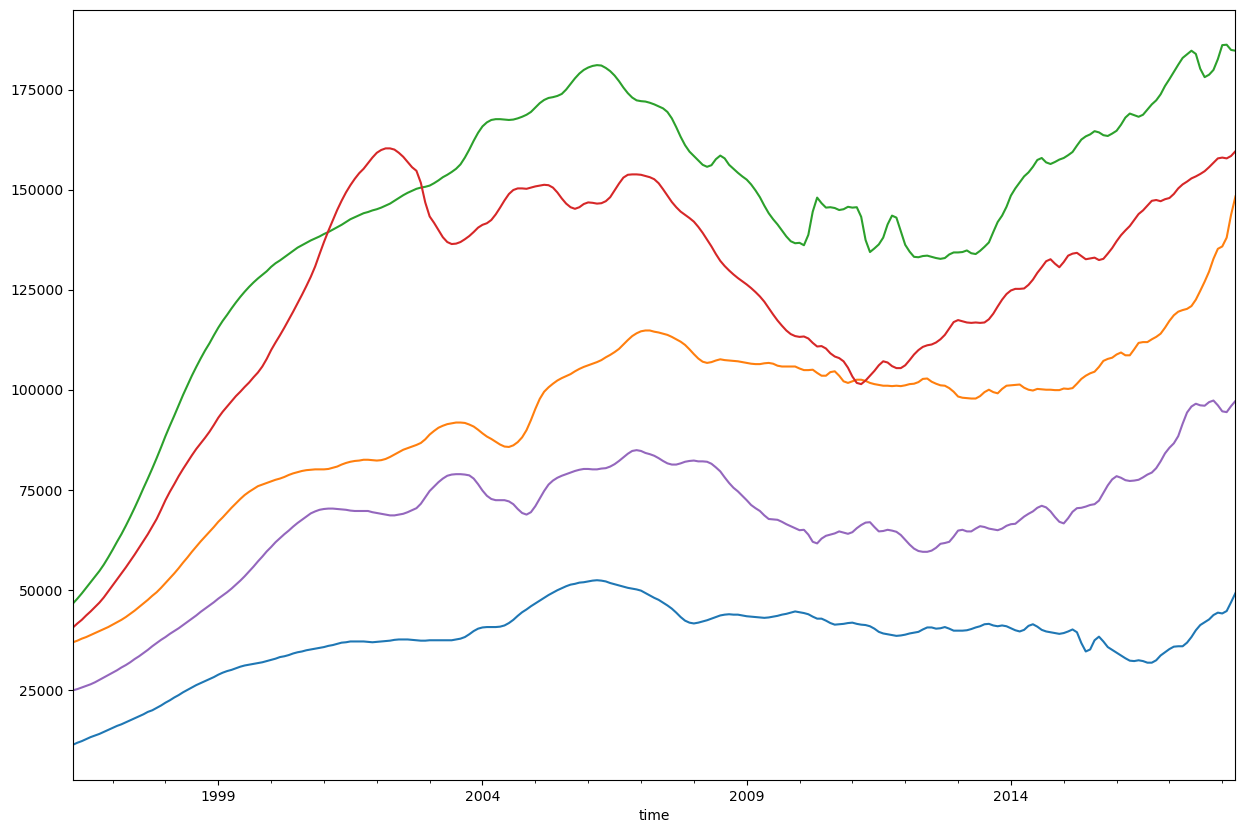

In [275]:
# Create a DataFrame for the top 10 zip codes' time series data
TS_top10 = df_reshaped

# Set the time column as the index
top_10_index = TS_top10.set_index('time')

# Display the first few rows of the time series data
print('Time series data for the 10 zip codes:\n', TS_top10.head())

# Create individualized time series for each zipcode
dfs_ts = []

# Iterate through unique zip codes and create separate dataframes with monthly frequency
for zip_code in TS_top10['ZipCode'].unique():
    df = top_10_index[top_10_index['ZipCode'] == zip_code].asfreq('MS')
    dfs_ts.append(df)

# Display the time series data for the first zipcode in the list
print(f'\nTime series for Zipcode {TS_top10["ZipCode"].unique()[0]}:')
dfs_ts[0].head()

# Calculate descriptive statistics for the chosen zip codes' values
for i in range(len(dfs_ts)):
    zip_code = dfs_ts[i].ZipCode.iloc[0]
    print(f'Value descriptive statistics for Zipcode {zip_code}:')
    print(f'{dfs_ts[i]["value"].describe()}\n')

# Plot time series for the chosen zip codes
plt.figure(figsize=(15, 10))
for i in range(10):
    zip_code = dfs_ts[i].ZipCode.iloc[0]
    dfs_ts[i]['value'].plot(label=f'Zipcode {zip_code}')
plt.legend()
plt.title('Time Series for Chosen Zipcodes')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


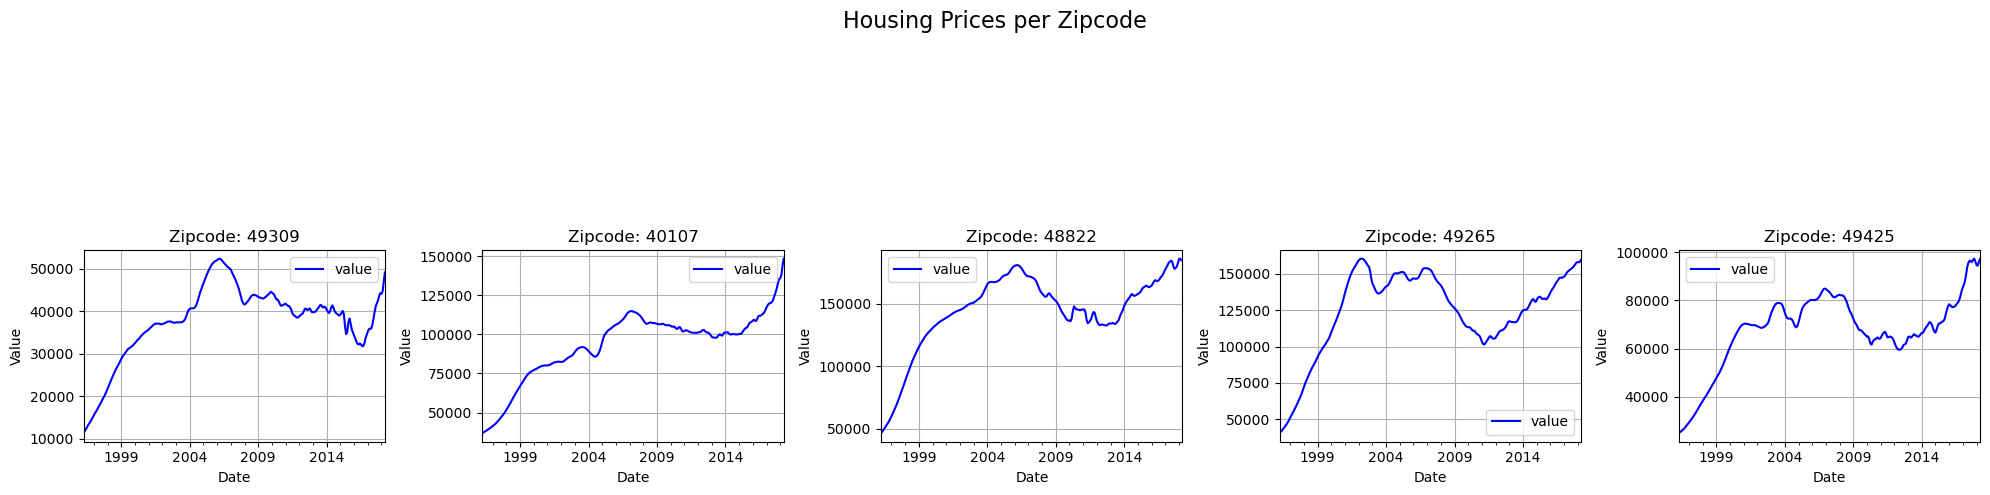

In [ ]:
# Create subplots for visualizing housing prices per zipcode
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
fig.suptitle('Housing Prices per Zipcode', fontsize=16)

# Plot monthly returns for each of the top 5 zip codes
for i, ax in enumerate(axes.flatten()):
    zip_code = dfs_ts[i].ZipCode.iloc[0]
    
    # Plot housing prices
    dfs_ts[i]['value'].plot(ax=ax, color='b')
    ax.set_title(f'Zipcode: {zip_code}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend(loc='best')
    ax.grid(True)

# Adjust subplot layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

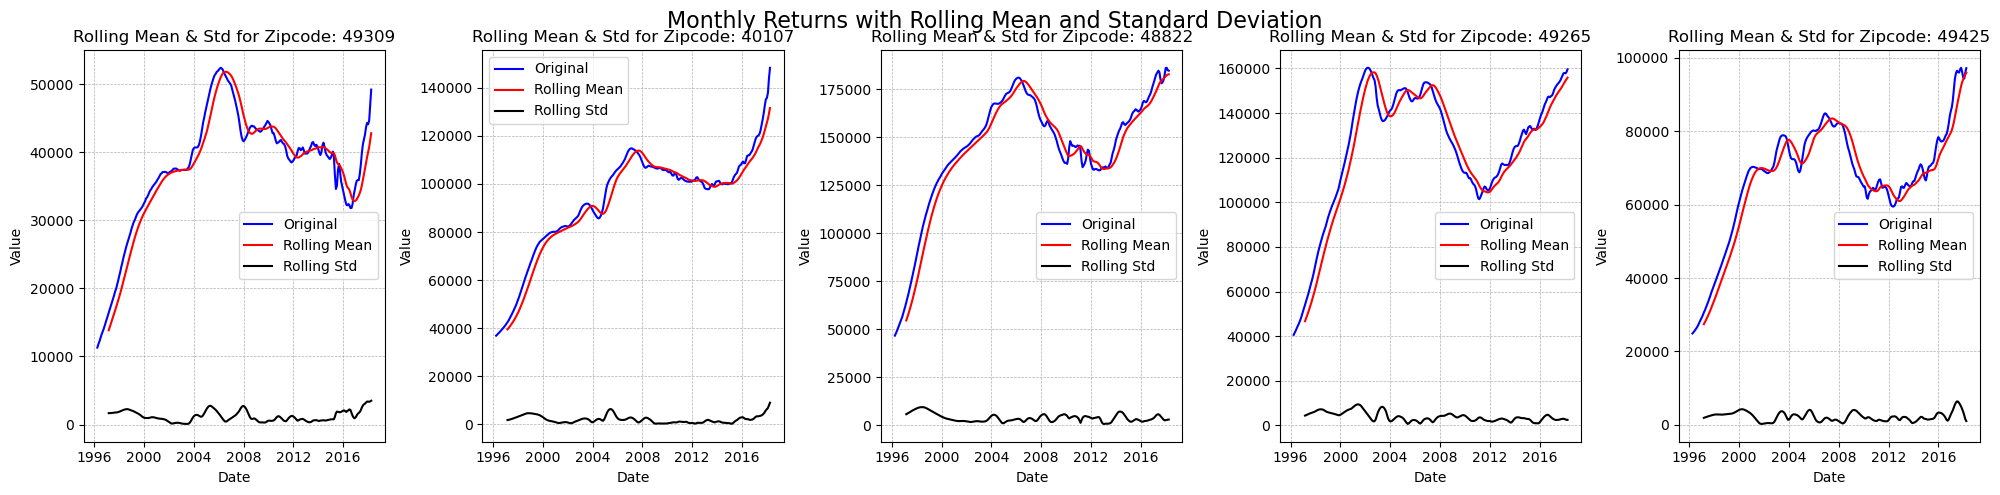

In [ ]:
# Create subplots for plotting monthly returns with rolling mean and std for each of the top 10 zip codes
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
fig.suptitle('Monthly Returns with Rolling Mean and Standard Deviation', fontsize=16)

# Plot monthly returns, rolling mean, and rolling std for each zipcode
for i, ax in enumerate(axes.flatten()):
    zip_code = dfs_ts[i].ZipCode.iloc[0]
    
    # Calculate rolling mean and rolling std
    rolmean = dfs_ts[i]['value'].rolling(window=12, center=False).mean()
    rolstd = dfs_ts[i]['value'].rolling(window=12, center=False).std()

    # Plot original, rolling mean, and rolling std
    ax.plot(dfs_ts[i]['value'], color='blue', label='Original')
    ax.plot(rolmean, color='red', label='Rolling Mean')
    ax.plot(rolstd, color='black', label='Rolling Std')
    
    ax.legend(loc='best')
    ax.set_title(f'Rolling Mean & Std for Zipcode: {zip_code}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust subplot layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


* Initially, the data appears stable. To assess its stationarity, we use the Augmented Dickey-Fuller test. The null hypothesis suggests non-stationarity, while the alternative implies stationarity. We'll rely on a 95% confidence level and reject the null hypothesis if the p-value is below 0.05 for a robust determination of stationarity.

In [ ]:
# Check for stationarity
for i in range(10):
    results = adfuller(dfs_ts[i]['value'].dropna())
    
    print(f'ADFuller test p-value for zipcode: {dfs_ts[i].ZipCode[0]}')
    print('p-value:',results[1])
    
    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

ADFuller test p-value for zipcode: 49309
p-value: 0.14237302731657314
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 40107
p-value: 0.9550929842851099
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 48822
p-value: 0.06934714490501583
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 49265
p-value: 0.12368703580975487
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 49425
p-value: 0.34712161138449815
Fail to reject the null hypothesis. Data is not stationary.



ADFuller test p-value for differenced series of zipcode: 49309
p-value: 0.00023355632659851963
Conclusion: Reject the null hypothesis. Differenced data is stationary.

ADFuller test p-value for differenced series of zipcode: 40107
p-value: 1.656622281964976e-09
Conclusion: Reject the null hypothesis. Differenced data is stationary.

ADFuller test p-value for differenced series of zipcode: 48822
p-value: 1.6875246856620694e-12
Conclusion: Reject the null hypothesis. Differenced data is stationary.

ADFuller test p-value for differenced series of zipcode: 49265
p-value: 1.789512206525145e-05
Conclusion: Reject the null hypothesis. Differenced data is stationary.

ADFuller test p-value for differenced series of zipcode: 49425
p-value: 1.7214650193724288e-11
Conclusion: Reject the null hypothesis. Differenced data is stationary.



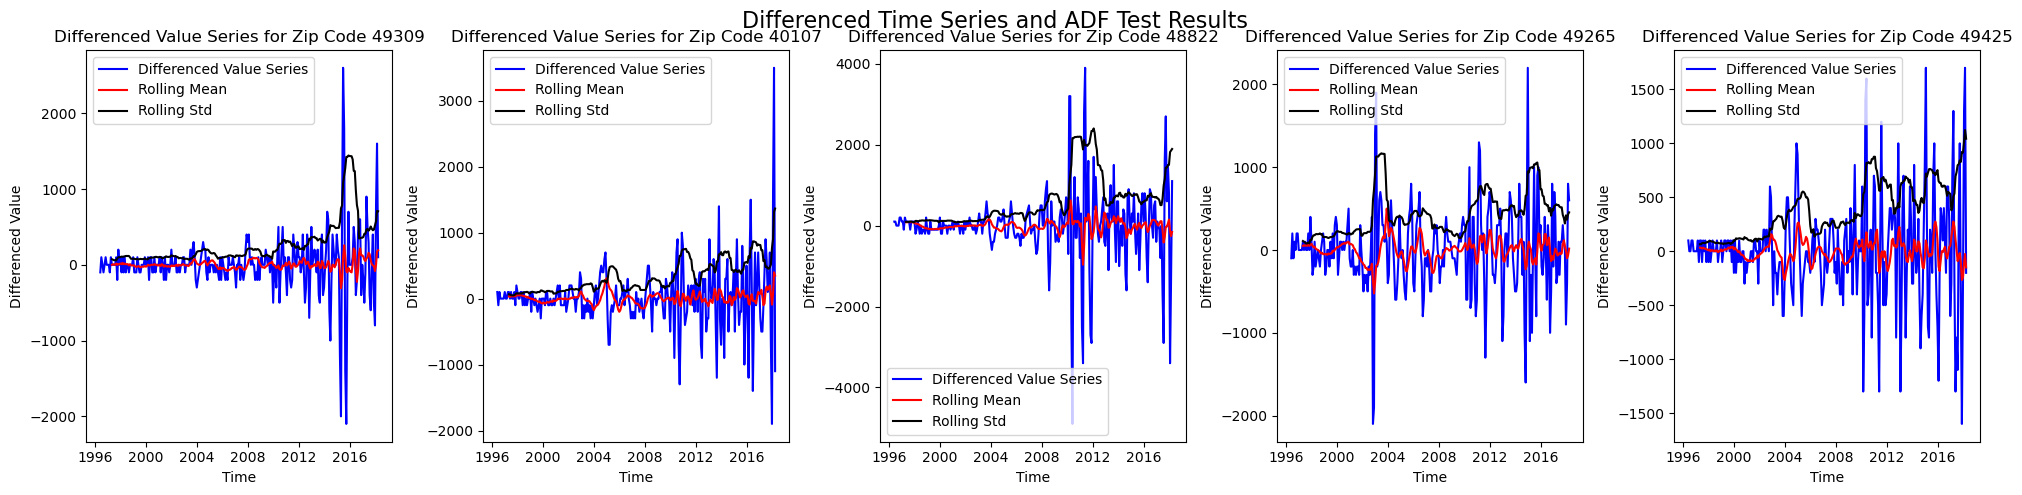

[(49309, 0.00023355632659851963),
 (40107, 1.656622281964976e-09),
 (48822, 1.6875246856620694e-12),
 (49265, 1.789512206525145e-05),
 (49425, 1.7214650193724288e-11)]

In [ ]:
# Create subplots for plotting differenced time series and ADF results
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
fig.suptitle('Differenced Time Series and ADF Test Results', fontsize=16)

differenced_adf = []

# Iterate through the top 10 zip codes
for i, ax in enumerate(axes.flatten()):
    zip_code = dfs_ts[i]['ZipCode'].iloc[0]
    
    # Differencing the time series
    dfs_ts[i]['differenced_return'] = dfs_ts[i]['value'].diff().diff().dropna()
    
    # Calculate rolling mean and std for differenced series
    rolmean = dfs_ts[i]['differenced_return'].rolling(window=12, center=False).mean()
    rolstd = dfs_ts[i]['differenced_return'].rolling(window=12, center=False).std()

    # Conduct ADF test on the differenced series
    results = adfuller(dfs_ts[i]['differenced_return'].dropna())
    p_value = results[1]
    differenced_adf.append((zip_code, p_value))

    # Display ADF test results
    print(f'ADFuller test p-value for differenced series of zipcode: {zip_code}')
    print('p-value:', p_value)
    if p_value > 0.05:
        print('Conclusion: Fail to reject the null hypothesis. Differenced data is not stationary.\n')
    else:
        print('Conclusion: Reject the null hypothesis. Differenced data is stationary.\n')

    # Plot the differenced time series
    ax.plot(dfs_ts[i].index, dfs_ts[i]['differenced_return'], color='blue', label='Differenced Value Series')
    ax.plot(rolmean, label='Rolling Mean', color='red')
    ax.plot(rolstd, label='Rolling Std', color='black')
    ax.set_title(f'Differenced Value Series for Zip Code {zip_code}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Differenced Value')
    ax.legend()

# Adjust subplot layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Display ADF test results for all zip codes
differenced_adf


In [ ]:
# Concatenate the list of DataFrames into a single DataFrame
df_combined = pd.concat(dfs_ts)

# Print the resulting DataFrame
df_combined

,RegionID,ZipCode,City,State,SizeRank,ROI,CV,std,mean,value,differenced_return
time,,,,,,,,,,,
1996-04-01,79678,49309,Bitely,MI,13315,3.353982,0.231683,8755.699818,37791.698113,11300.0,NaN
1996-05-01,79678,49309,Bitely,MI,13315,3.353982,0.231683,8755.699818,37791.698113,11800.0,NaN
1996-06-01,79678,49309,Bitely,MI,13315,3.353982,0.231683,8755.699818,37791.698113,12200.0,-100.0
1996-07-01,79678,49309,Bitely,MI,13315,3.353982,0.231683,8755.699818,37791.698113,12700.0,100.0
1996-08-01,79678,49309,Bitely,MI,13315,3.353982,0.231683,8755.699818,37791.698113,13200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,79742,49425,Holton,MI,12239,2.903614,0.230111,15550.058490,67576.226415,96100.0,-1600.0
2018-01-01,79742,49425,Holton,MI,12239,2.903614,0.230111,15550.058490,67576.226415,94600.0,-300.0
2018-02-01,79742,49425,Holton,MI,12239,2.903614,0.230111,15550.058490,67576.226415,94400.0,1300.0


In [ ]:
# Create a dictionary to store dataframes for each zipcode
zipcode_dff = {}

# Extract unique zipcodes from the combined dataframe
unique_zc = df_combined['ZipCode'].unique()

# Iterate over unique zipcodes and create individual dataframes for each
for zipcode in unique_zc:
    # Filter the combined dataframe for the current zipcode
    zipcode_df = df_combined[df_combined['ZipCode'] == zipcode]

    # Remove rows with missing values (nulls)
    zipcode_df = zipcode_df.dropna()

    # Store the filtered dataframe in the dictionary with the zipcode as the key
    zipcode_dff[zipcode] = zipcode_df

# Access a specific dataframe for a particular zipcode
zipcode_49309_df = zipcode_dff[49309]
zipcode_40107_df = zipcode_dff[40107]
zipcode_48822_df = zipcode_dff[48822]
zipcode_49265_df = zipcode_dff[49265]
zipcode_49425_df = zipcode_dff[49425]
zipcode_29645_df = zipcode_dff[29645]
zipcode_66206_df = zipcode_dff[66206]
zipcode_48835_df = zipcode_dff[48835]
zipcode_48894_df = zipcode_dff[48894]
zipcode_15486_df = zipcode_dff[15486]

# Confirm if the specific dataframe retrieval has worked
zipcode_66206_df

,RegionID,ZipCode,City,State,SizeRank,ROI,CV,std,mean,value,differenced_return
time,,,,,,,,,,,
1996-06-01,79648,49265,Onsted,MI,10691,2.931034,0.232729,28923.199467,124278.490566,42500.0,-100.0
1996-07-01,79648,49265,Onsted,MI,10691,2.931034,0.232729,28923.199467,124278.490566,43600.0,200.0
1996-08-01,79648,49265,Onsted,MI,10691,2.931034,0.232729,28923.199467,124278.490566,44600.0,-100.0
1996-09-01,79648,49265,Onsted,MI,10691,2.931034,0.232729,28923.199467,124278.490566,45700.0,100.0
1996-10-01,79648,49265,Onsted,MI,10691,2.931034,0.232729,28923.199467,124278.490566,46800.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,79648,49265,Onsted,MI,10691,2.931034,0.232729,28923.199467,124278.490566,157800.0,0.0
2018-01-01,79648,49265,Onsted,MI,10691,2.931034,0.232729,28923.199467,124278.490566,158000.0,-900.0
2018-02-01,79648,49265,Onsted,MI,10691,2.931034,0.232729,28923.199467,124278.490566,157800.0,-400.0


##### Plot ACF AND PACF

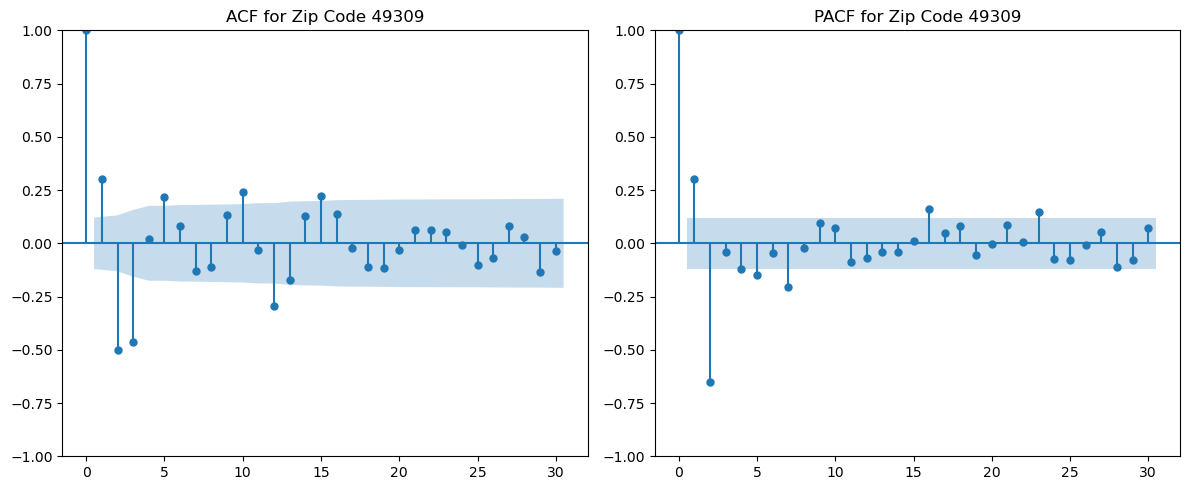

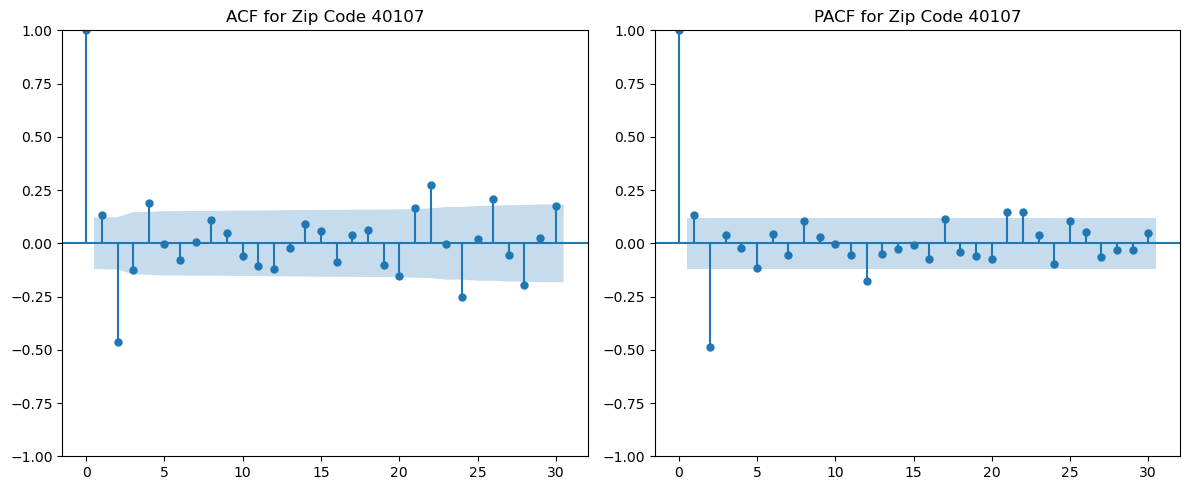

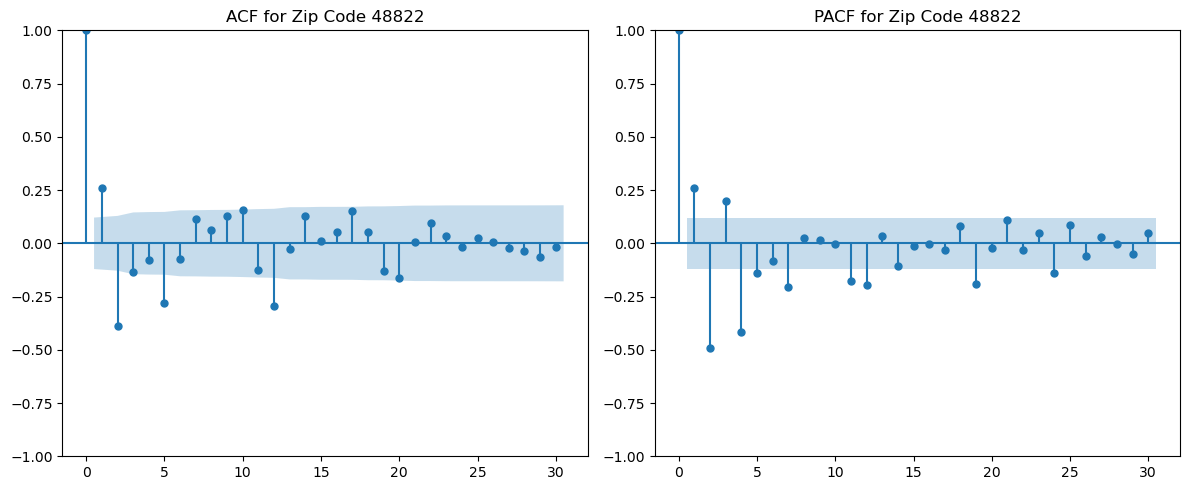

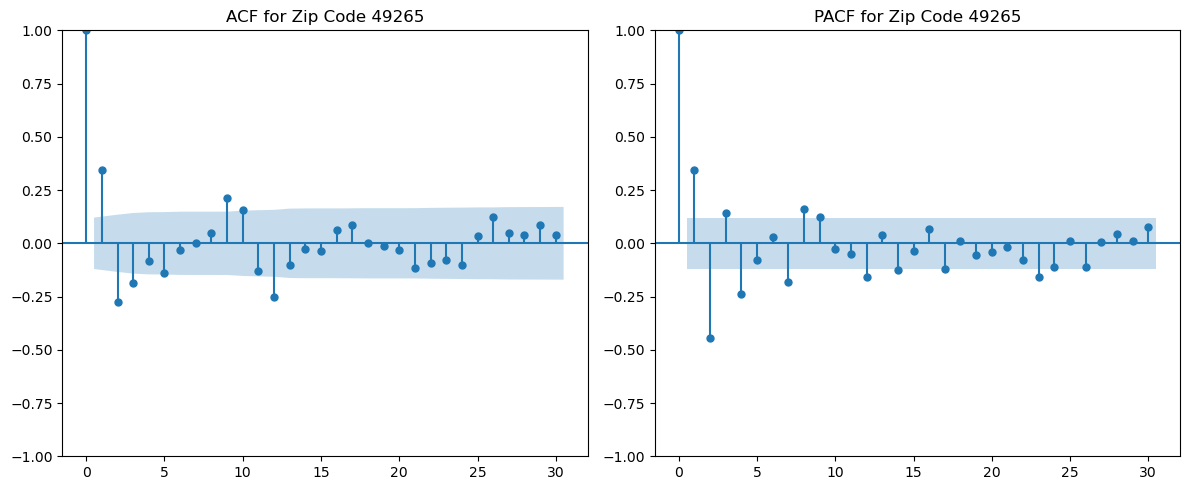

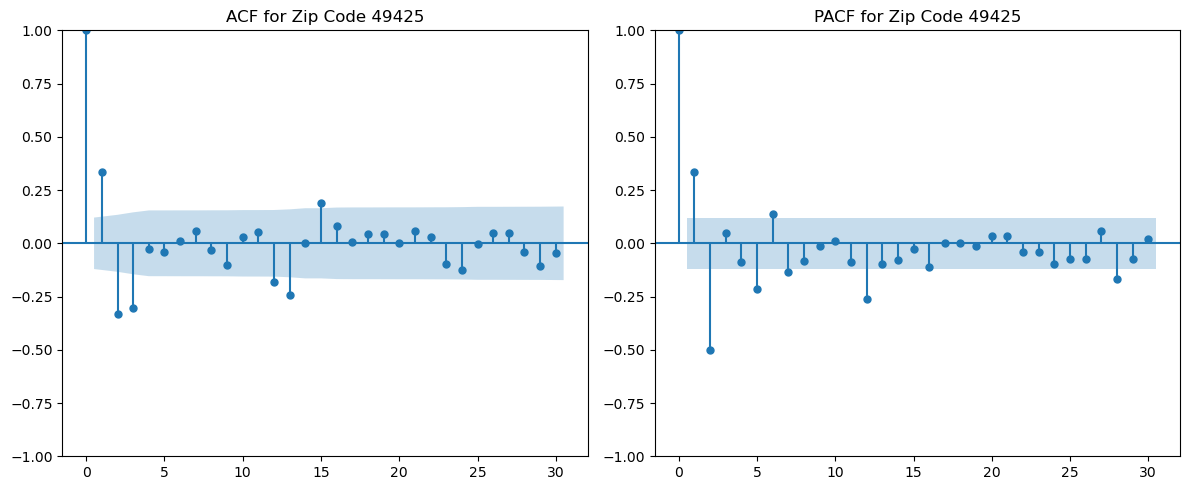

In [ ]:
# Iterate over the dictionary of zipcode dataframes
for zipCode, zipcode_df in zipcode_dff.items():
    # Drop null values in the dataframe
    zipcode_df.dropna(inplace=True)

    # Create a subplot with two plots side by side
    plt.figure(figsize=(12, 5))

    # Plot the AutoCorrelation Function (ACF) for the differenced time series
    plt.subplot(121)
    plot_acf(zipcode_df['differenced_return'], lags=30, ax=plt.gca())
    plt.title(f'ACF for Zip Code {zipCode}')

    # Plot the Partial AutoCorrelation Function (PACF) for the differenced time series
    plt.subplot(122)
    plot_pacf(zipcode_df['differenced_return'], lags=30, ax=plt.gca())
    plt.title(f'PACF for Zip Code {zipCode}')

    # Adjust subplot layout for better presentation
    plt.tight_layout()

    # Show the plots for the current zipcode
    plt.show()


### 7. Modelling

In [ ]:
# Define a function for ARIMA modeling
def build_arima_model(zipcode_df, column, order):
    # Split the data into train and test sets
    train_size = int(0.8 * len(zipcode_df))
    train, test = zipcode_df[:train_size], zipcode_df[train_size:]

    # Fit the ARIMA model
    model = ARIMA(train[column], order=order)
    model_fit = model.fit()

    # Forecast
    forecast_steps = len(test)
    forecast_diff = model_fit.forecast(steps=forecast_steps)  # Forecast on the differenced scale

    # Back-transform the forecasted differenced series to obtain the 'value' series
    forecast_original = forecast_diff.cumsum() + train[column].iloc[-1]

    # Create a time index for the forecasted values
    forecast_index = pd.date_range(start=test.index[-1], periods=forecast_steps, freq='M')

    # Calculate AIC value
    aic = model_fit.aic

    # Calculate RMSE using the back-transformed forecasted 'value' series
    rmse = np.sqrt(MSE(test[column], forecast_original))

    # Print model information and evaluation metrics
    print(f'ARIMA Parameters: p={order[0]}, d={order[1]}, q={order[2]}')
    print(f'RMSE: {rmse}')
    print(f'AIC: {aic}')

    # Plot the original data and the forecasted values in the original scale
    plt.figure(figsize=(10, 4))
    plt.plot(zipcode_df.index, zipcode_df['value'], label='Actual')
    plt.plot(forecast_index, forecast_original, label='Forecast', color='red')
    plt.legend()
    plt.title(f'ARIMA Forecast for Zip Code {zipcode_df["ZipCode"].iloc[0]}')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

    return aic

ARIMA Parameters: p=1, d=0, q=1
RMSE: 871.9353674135348
AIC: 2766.2120310570954


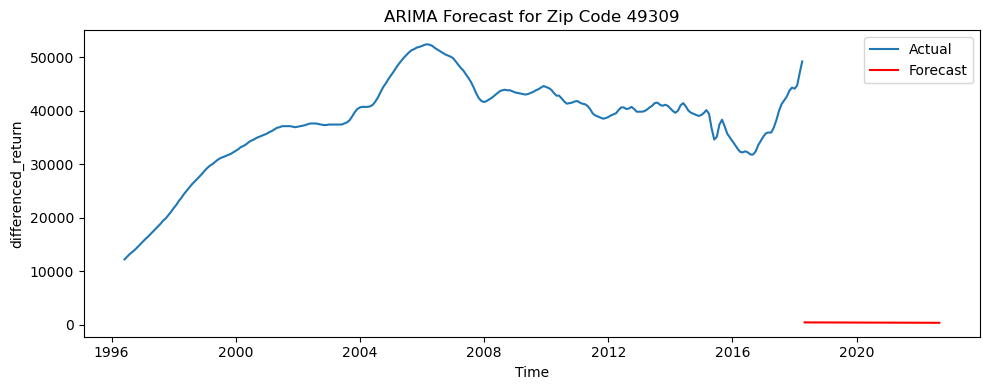

ARIMA Parameters: p=1, d=0, q=2
RMSE: 945.6208790716436
AIC: 2965.0680100990567


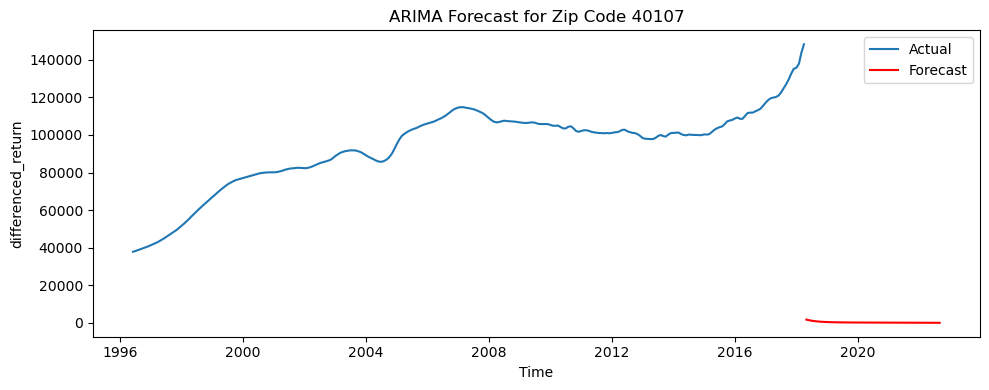

ARIMA Parameters: p=2, d=0, q=1
RMSE: 1130.980950257486
AIC: 3322.6227268943067


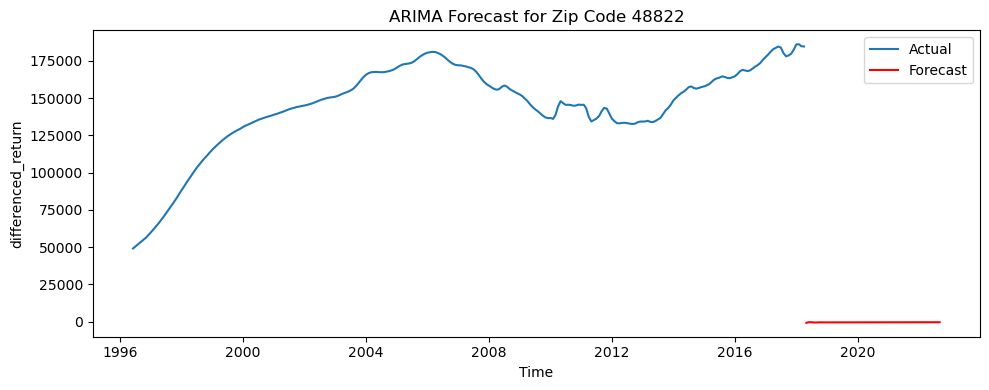

ARIMA Parameters: p=2, d=0, q=1
RMSE: 674.2779990050908
AIC: 3068.286830553142


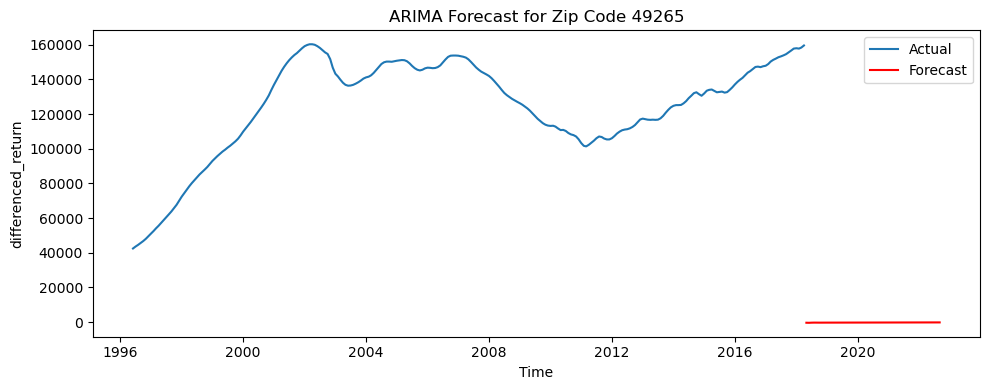

ARIMA Parameters: p=1, d=0, q=1
RMSE: 1154.5558849865076
AIC: 3048.455669932737


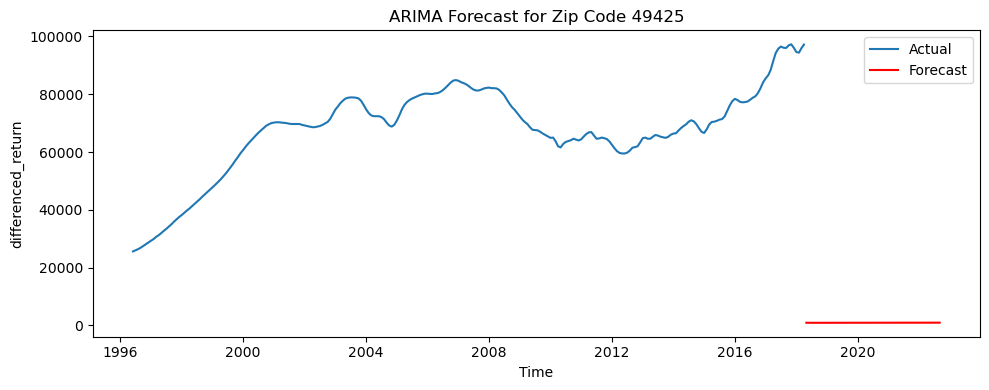

In [ ]:
# Specify the ARIMA order for each zipcode
order_by_zipcode = {
    49309: (1, 0, 1),
    40107: (1, 0, 2),
    48822: (2, 0, 1),
    49265: (2, 0, 1),
    49425: (1, 0, 1),
    29645: (1, 0, 1),
    66206: (1, 0, 1),
    48835: (2, 0, 2),
    48894: (1, 0, 1),
    15486: (2, 0, 1)
}

# Iterate over the dictionary of ZipCode dataframes and call the function
for ZipCode, zipcode_df in zipcode_dff.items():
    if ZipCode in order_by_zipcode:
        order = order_by_zipcode[ZipCode]
        aic = build_arima_model(zipcode_df, 'differenced_return', order)  # Use 'column' argument

#### Seasonal Decomposition

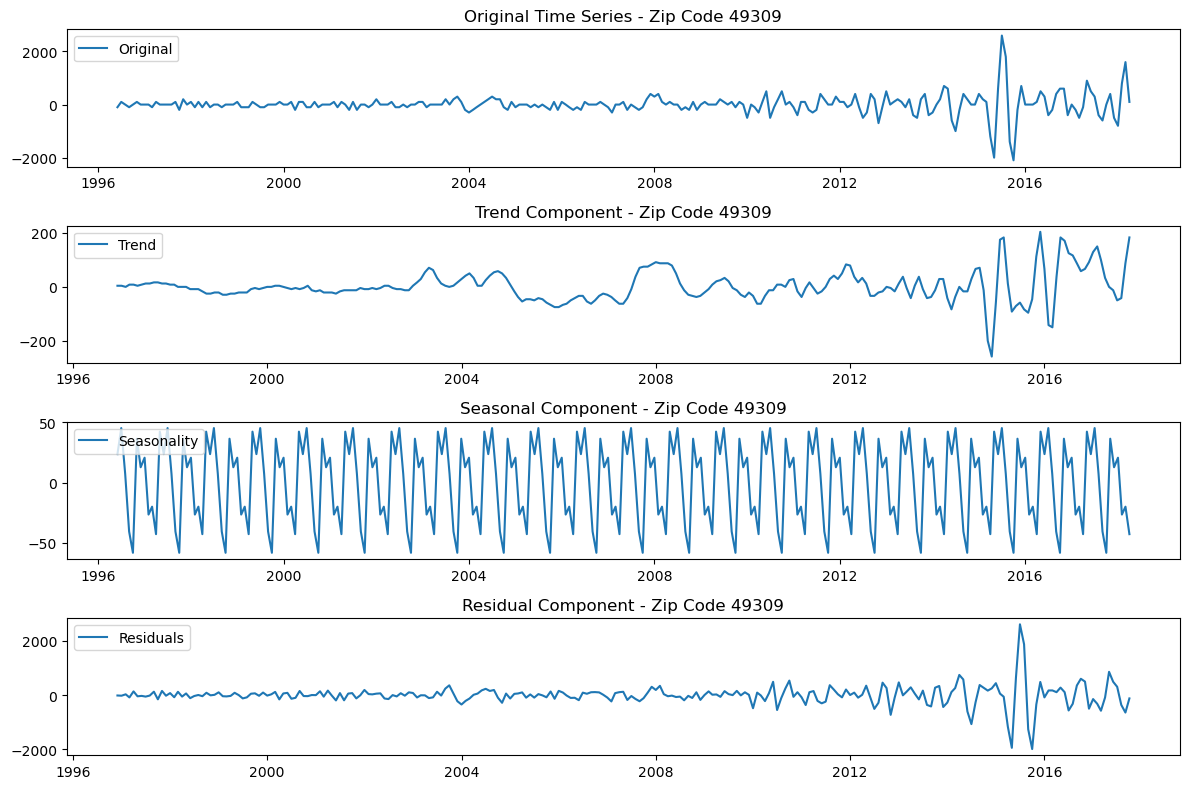

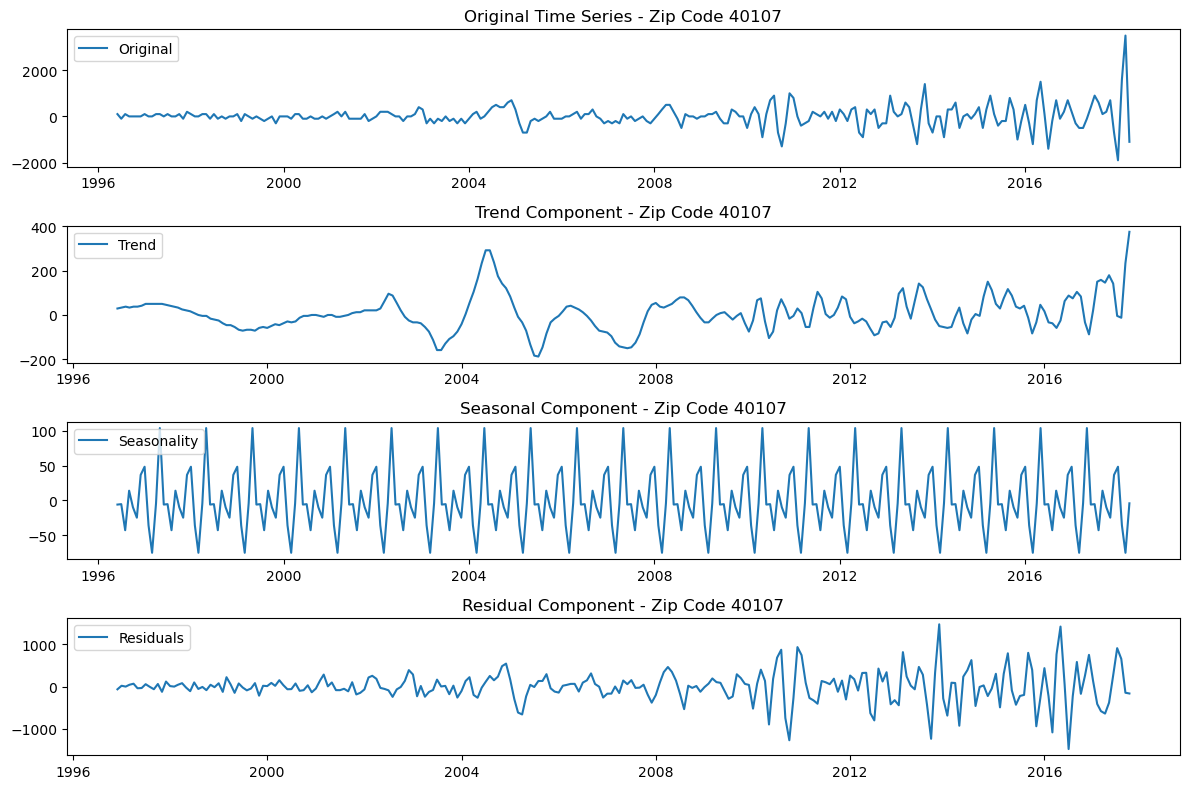

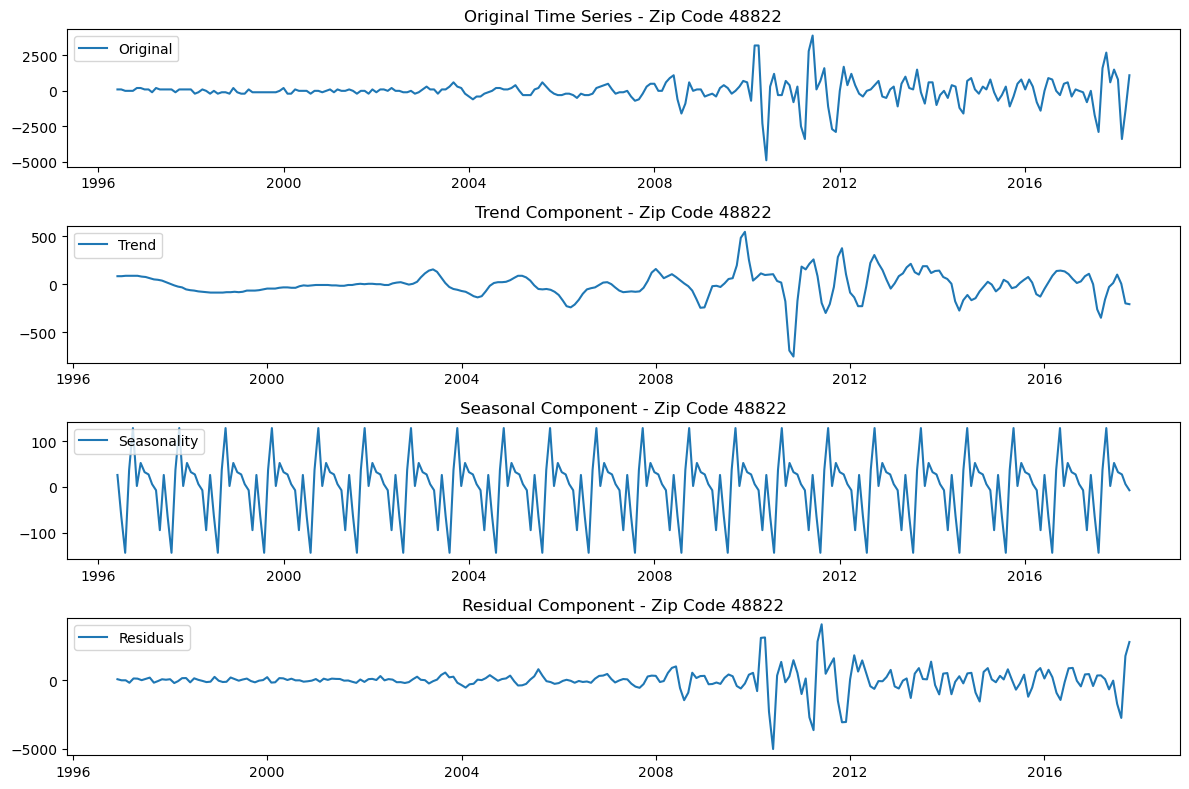

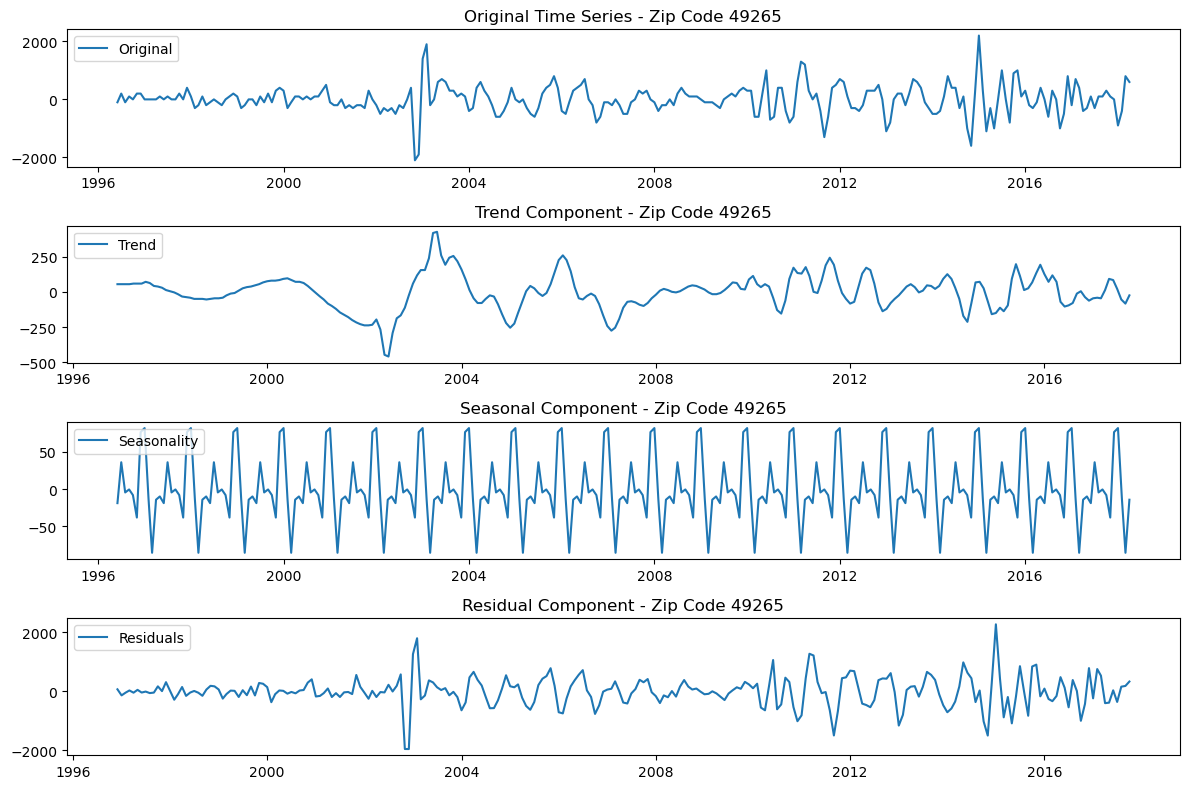

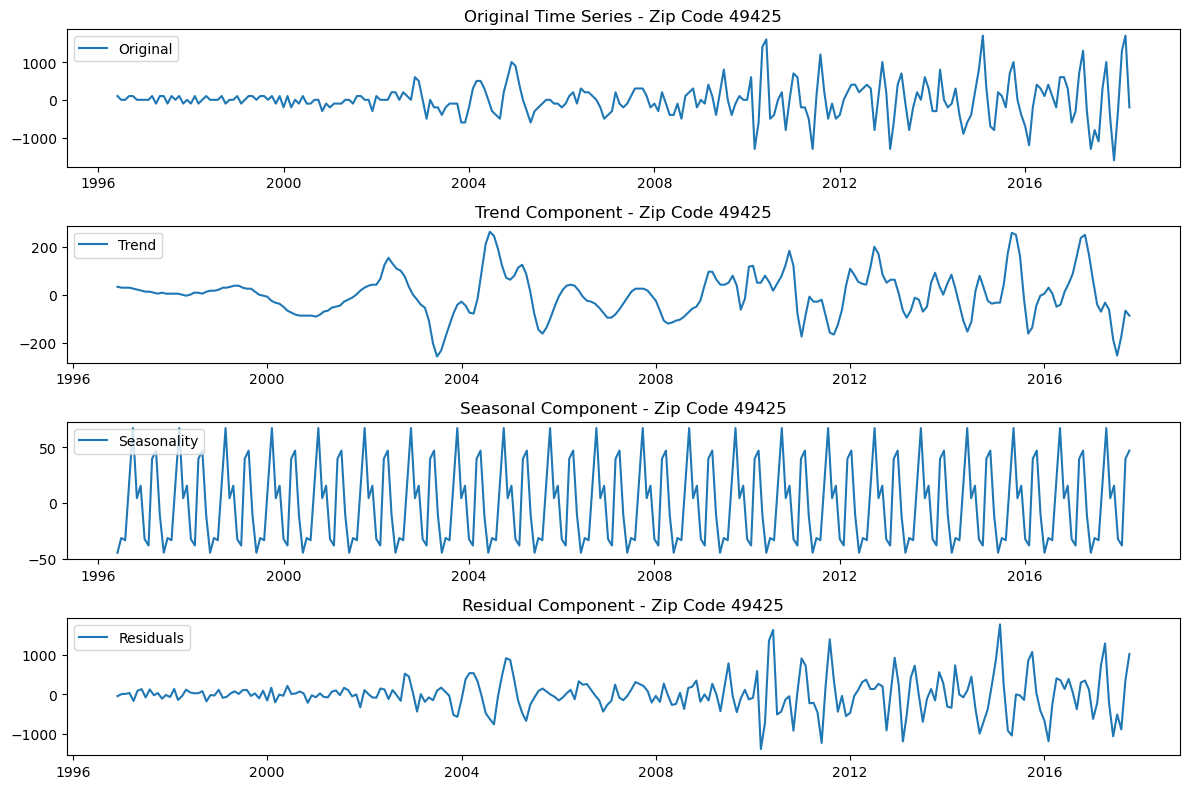

In [ ]:
# Specify the frequency of seasonality(monthly data)
seasonality_frequency = 12

# Iterate over the dictionary of zipcode dataframes
for ZipCode, zipcode_df in zipcode_dff.items():
    time_series = zipcode_df['differenced_return']

    # Perform seasonal decomposition
    decomposition = seasonal_decompose(time_series, period=seasonality_frequency)

    # Plot the decomposed components
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(time_series, label='Original')
    plt.legend(loc='upper left')
    plt.title(f'Original Time Series - Zip Code {ZipCode}')

    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.title(f'Trend Component - Zip Code {ZipCode}')

    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.title(f'Seasonal Component - Zip Code {ZipCode}')

    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.title(f'Residual Component - Zip Code {ZipCode}')

    plt.tight_layout()
    plt.show()


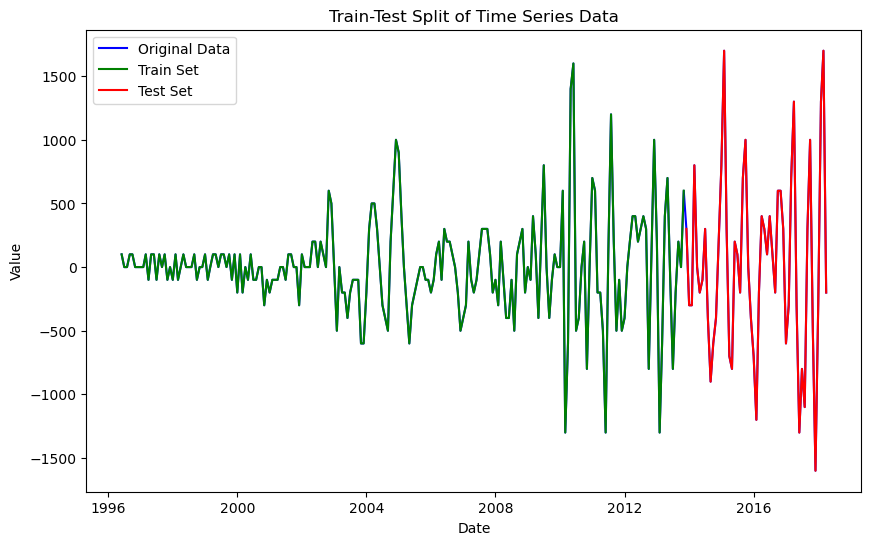

In [ ]:
# Visualizing the split data
train_size = int(len(zipcode_df) * 0.8)
train, test = zipcode_df[:train_size], zipcode_df[train_size:]

plt.figure(figsize=(10, 6))
plt.plot(zipcode_df.index, zipcode_df['differenced_return'], label='Original Data', color='blue')
plt.plot(train.index, train['differenced_return'], label='Train Set', color='green')
plt.plot(test.index, test['differenced_return'], label='Test Set', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train-Test Split of Time Series Data')
plt.legend()
plt.show()

In [ ]:
# calculate the projections for each zip code.
# A dictionary of the best parameters
best_params_by_zipcode = {
    49309: ((4, 2, 1), (1, 0, 1, 12)),
    40107: ((3, 1 ,3), (1, 0, 1, 12)),
    48822: ((1, 2, 2), (1, 0, 1, 12)),
    49265: ((1, 2, 3), (0, 0, 2, 12)),
    49425: ((3, 2, 3), (0, 0, 2, 12)),
    29645: ((1, 2, 3), (1, 0, 1, 12)),
    66206: ((2, 1, 1), (0, 0, 0, 12)),
    48835: ((0, 2, 3), (2, 0, 1, 12)),
    48894: ((2, 2, 1), (0, 0, 1, 12)),
    15486: ((2, 1, 0), (2, 0, 0, 12))
}

In [ ]:
# Forecating
# Define a function for calculating projections

def calculate_projections(zipcode_df, ZipCode, years):

    # Define steps for forecasting
    steps = years * 12

    # Create list to append projection metrics
    projections = []

    # Iterate through each zip code
    for zipcode in ZipCode:

        # Get the specific dataframe for the current zipcode
        zip_ts = zipcode_df[zipcode_df['ZipCode'] == zipcode]

        if not zip_ts.empty:
            # Get the last value of the time series
            current_value = zip_ts['value'].iloc[-1]

            # Plug the optimal parameter values into a SARIMAX model
            order, seasonal_order = best_params_by_zipcode.get(zipcode, ((1, 0, 1), (1, 0, 1, 12)))

            SARIMAX = sm.tsa.statespace.SARIMAX(zip_ts['differenced_return'],
                                                order=order,
                                                seasonal_order=seasonal_order,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

            # Fit the model
            output = SARIMAX.fit()

            # Get forecast and confidence interval for steps ahead in future
            forecast_steps = steps
            forecast = output.get_forecast(steps=forecast_steps)
            forecast_mean = forecast.predicted_mean
            conf_int = forecast.conf_int()

            # Calculate ROI based on the forecasted mean
            projected_value = current_value + forecast_mean.sum()
            roi = ((projected_value / current_value)- 1) * 100

            # Create dictionary to store projections
            projected_data = {
                'Zip Code': zipcode,
                'Investment Value ($)': current_value.round(2),
                'Predicted Sale Price ($)': projected_value.round(2),
                'Predicted ROI (%)': roi.round(2)
            }

            # Append to projections list
            projections.append(projected_data)

    # Return projections as a DataFrame
    return pd.DataFrame(projections)

In [ ]:
# 2-year forecast
# Call the function
zipcodes_to_project = [49309, 40107, 48822, 49265, 49425, 29645, 66206, 48835, 48894, 15486]
years_to_forecast = 2

# List to store the projected data for all zipcodes
all_projected_data = []

# Iterate over the dictionary of zipcode dataframes and call the function
for ZipCode, zipcode_df in zipcode_dff.items():
    if zipcode in order_by_zipcode:
        order = order_by_zipcode[ZipCode]
        projected_data = calculate_projections(zipcode_df, zipcodes_to_project, years_to_forecast)
        all_projected_data.append(projected_data)

# Concatenate all projected data into a single DataFrame
final_projected_data = pd.concat(all_projected_data, ignore_index=True)

final_projected_data.sort_values(by='Predicted ROI (%)', ascending=False)

,Zip Code,Investment Value ($),Predicted Sale Price ($),Predicted ROI (%)
2,48822,184700.0,197993.14,7.20
0,49309,49200.0,51780.13,5.24
3,49265,159600.0,158822.35,-0.49
4,49425,97200.0,96601.21,-0.62
1,40107,148300.0,146367.82,-1.30


In [ ]:
final_projected_data.sort_values(by='Predicted ROI (%)', ascending=False).head()

,Zip Code,Investment Value ($),Predicted Sale Price ($),Predicted ROI (%)
2,48822,184700.0,197993.14,7.20
0,49309,49200.0,51780.13,5.24
3,49265,159600.0,158822.35,-0.49
4,49425,97200.0,96601.21,-0.62
1,40107,148300.0,146367.82,-1.30


### 8. Conclusion

* **Top Investment Zipcodes:**
* Zip Code 48822

    * Invest: $184,700
    * 2-Year ROI: 7.20%

* Zip Code 49309:

    * Invest: $49,200
    * 2-Year ROI: 5.24%

* Zip Code 29645:

    * Invest: $116,500
    * 2-Year ROI: 1.44%

* Zip Code 48835:

    * Invest: $138,600
    * 2-Year ROI: 0.01%

* Zip Code 49265:

    * Invest: $159,600
    * 2-Year ROI: -0.48%

### 8. Recommedation

* Zip codes 48822, 49309, 29645, and 48835 emerge as prime investment opportunities, boasting promising ROIs and expected property value appreciation over the next two years. We recommend that Fahari seriously consider these options for their investment portfolio. These choices strike a harmonious balance between appealing property prices and lucrative returns on investment, aligning perfectly with Boma Yangu's risk tolerance.

* Regarding zip code 49265, we advise Fahari to exercise prudence, as it hints at the potential for a negative return on investment.

### 9. Next Steps
* Enhance data by adding economic indicators, interest rates, and demographics. Use SARIMAX to improve predictions.

* Utilize advanced models like LSTM RNNs for better forecasting.